<a href="https://colab.research.google.com/github/charann90/Mobile-Price-Range-Prediction/blob/main/Mobile_price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Data uploading

In [3]:
df=pd.read_csv('/content/data_mobile_price_range.csv')

In [4]:
df.head().T

,0,1,2,3,4
battery_power,842.0,1021.0,563.0,615.0,1821.0
blue,0.0,1.0,1.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2
dual_sim,0.0,1.0,1.0,0.0,0.0
fc,1.0,0.0,2.0,0.0,13.0
four_g,0.0,1.0,1.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0
m_dep,0.6,0.7,0.9,0.8,0.6
mobile_wt,188.0,136.0,145.0,131.0,141.0
n_cores,2.0,3.0,5.0,6.0,2.0


# Data Wrangling

In [ ]:
#checking null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

The dataset has no null values

In [ ]:
#checking the data type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# EDA

In [4]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [5]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


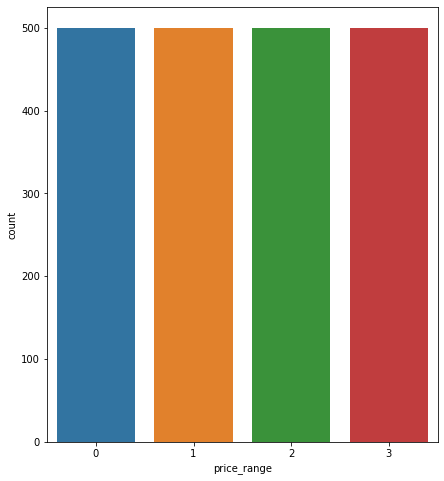

In [6]:
plt.figure(figsize=(7,8))
sns.countplot(df['price_range'])

We have equal frequencies of all the price range

In [ ]:
list(df.columns.values)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

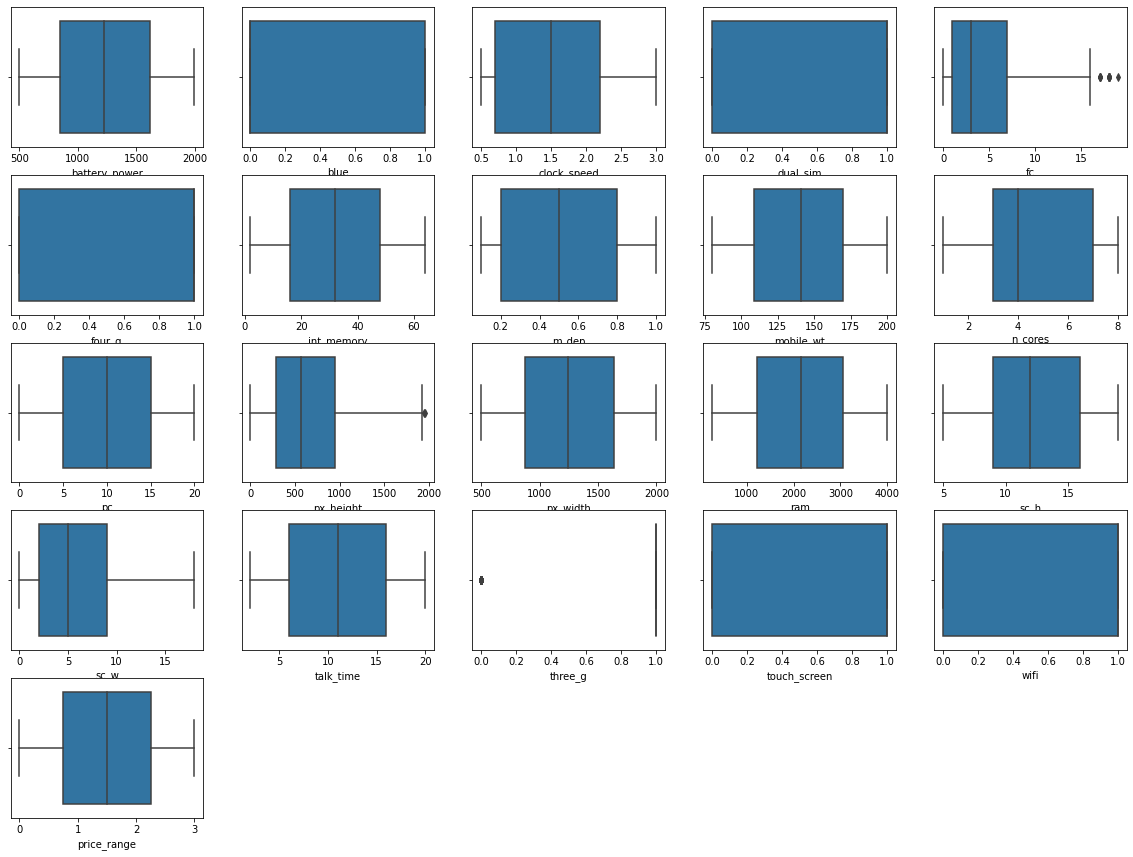

In [ ]:
#looking for outliers
plt.figure(figsize=(20,18))
for index, i in enumerate(list(df.columns.values)):
  plt.subplot(6,5,index+1)
  sns.boxplot(df[i])
  


There are not much outliers

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


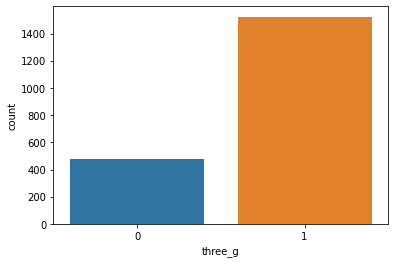

In [ ]:
sns.countplot(df['three_g'])

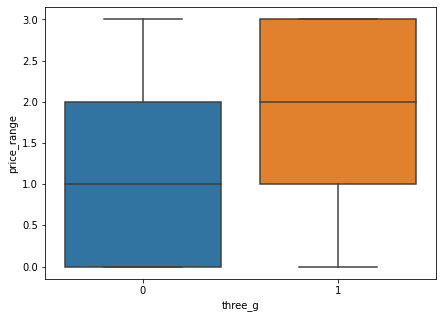

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['price_range'], x = df['three_g'])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


here both px_height and sc_w has zero values, so there is a need of replacing or droping the zero values 

In [4]:
df['px_height'][df[df['px_height']==0].index]=df['px_height'].mean()
df['sc_w'][df[df['sc_w']==0].index]=df['sc_w'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


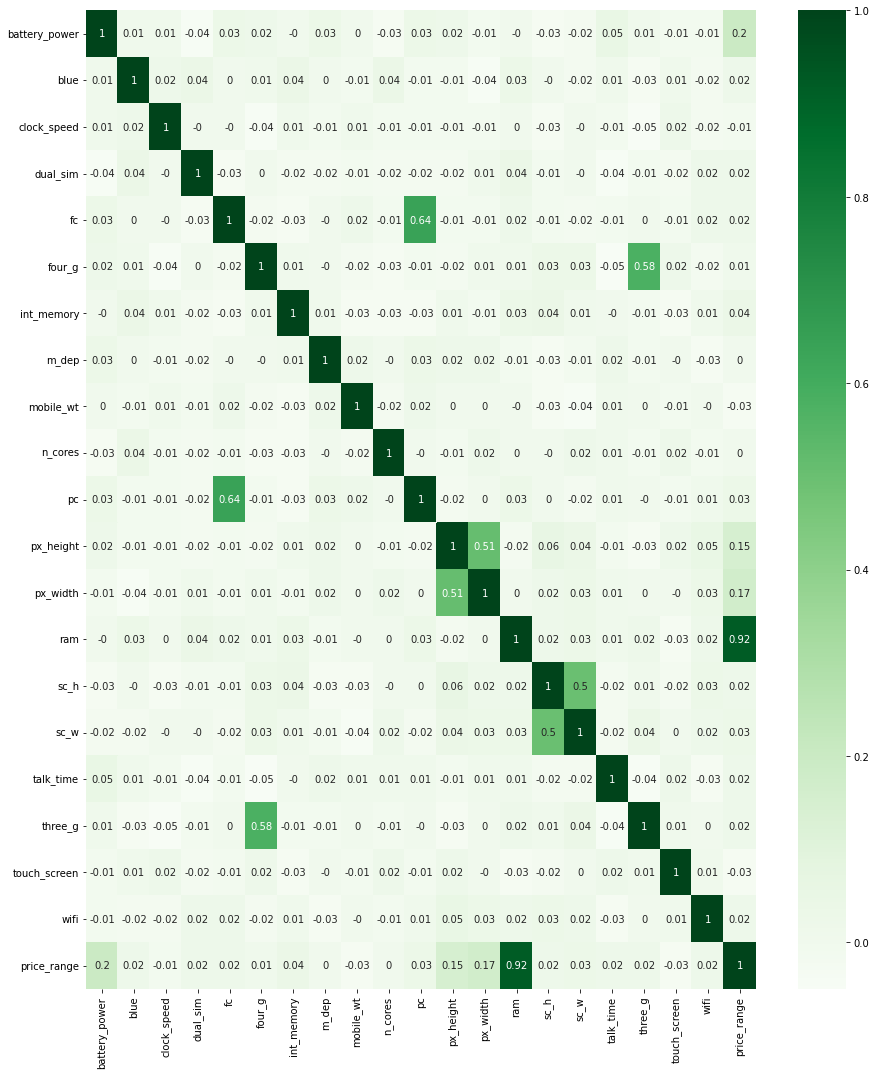

In [ ]:
plt.figure(figsize=(15,18))
sns.heatmap(round(df.corr(),2),cmap='Greens',annot=True)

Here Ram has highest correlation with price range. So except 'battery_power,'px_height','px_width','ram'and binary value columns, we can drop the remaining fetures as the dependency of pricing is least on other factors.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


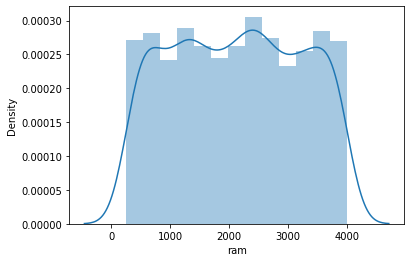

In [ ]:
sns.distplot(df['ram'])

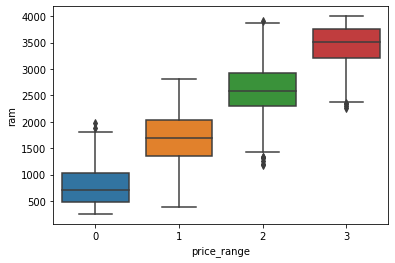

In [ ]:
sns.boxplot(x='price_range', y='ram', data=df)

In [ ]:
numeric_features = df.describe().columns

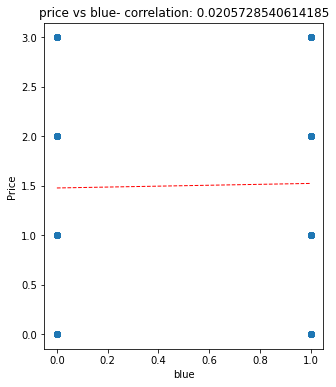

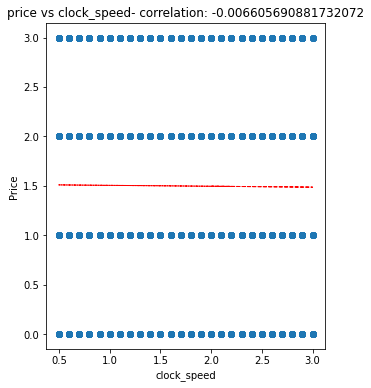

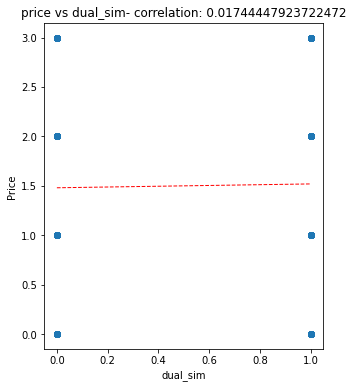

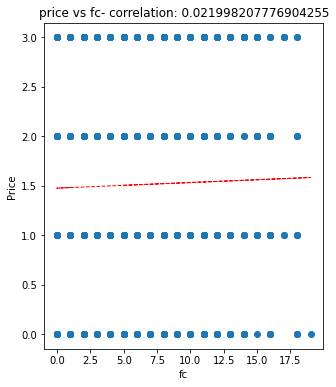

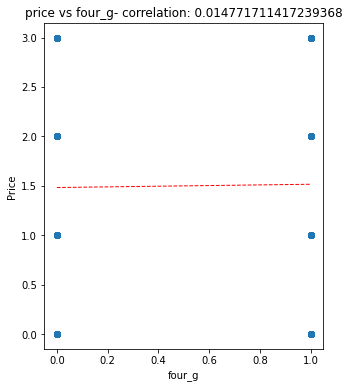

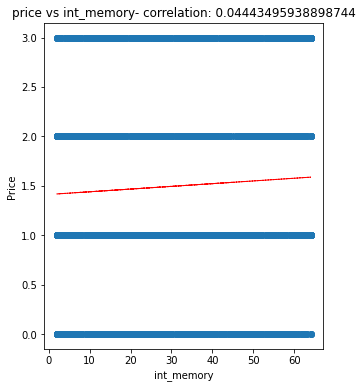

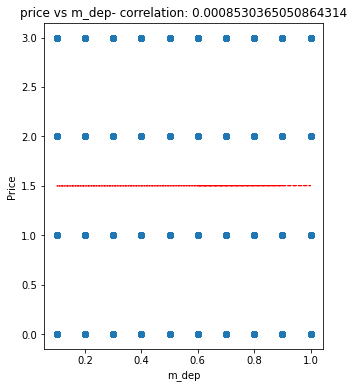

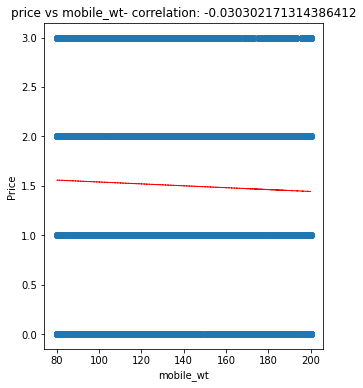

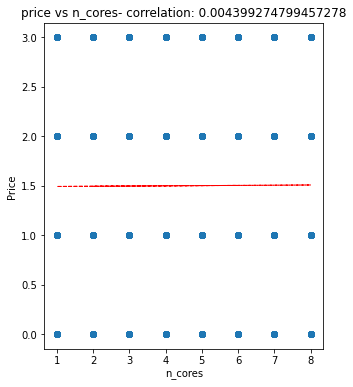

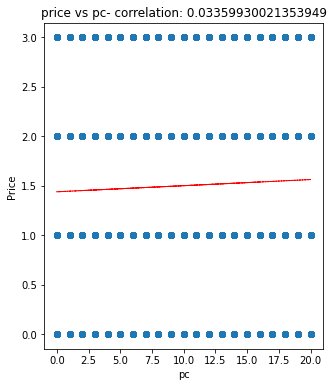

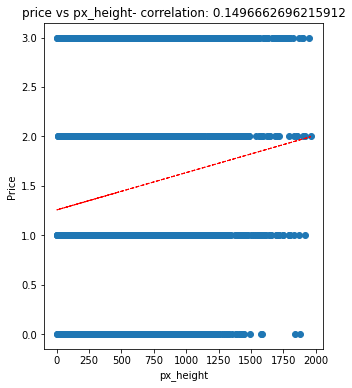

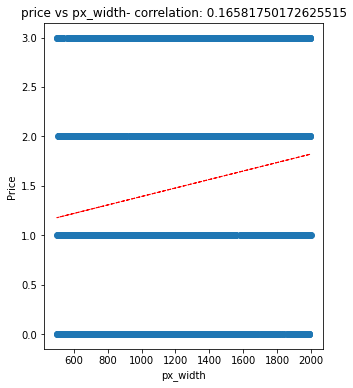

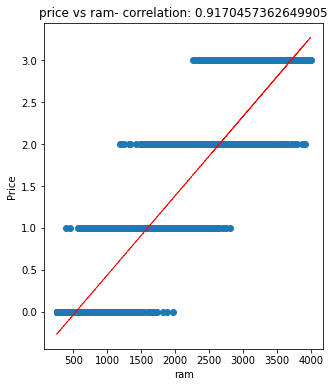

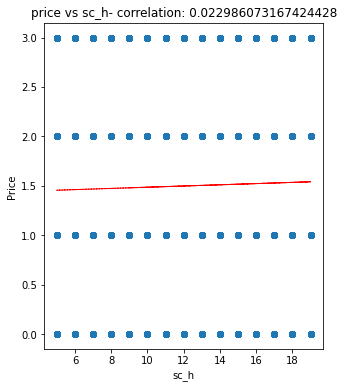

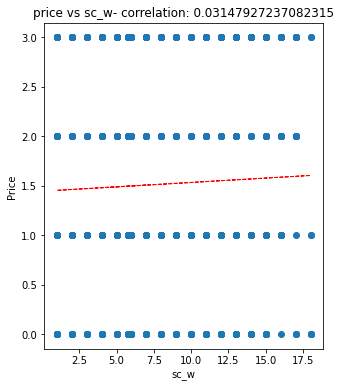

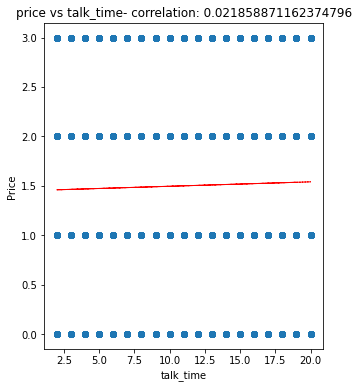

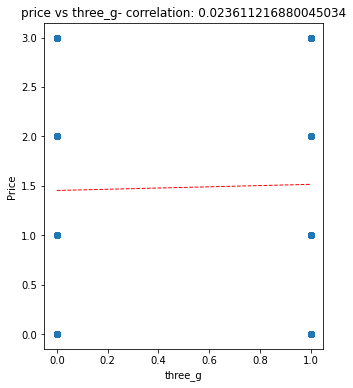

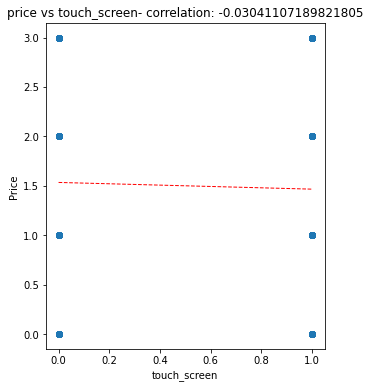

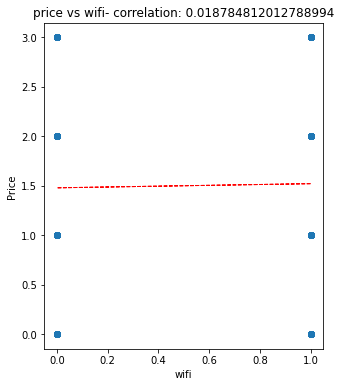

In [ ]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(5,6))
    ax = fig.gca()
    feature = df[col]
    i = df['price_range']
    correlation = feature.corr(i)
    plt.scatter(x=feature, y=i)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['price_range'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Plotting all the categorical features with price range

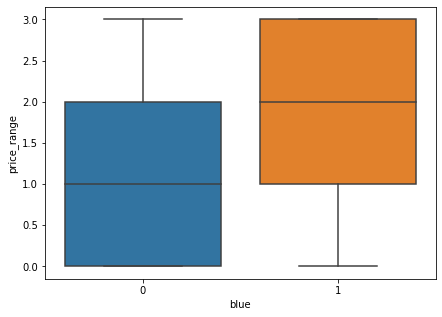

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['price_range'], x = df['blue'])



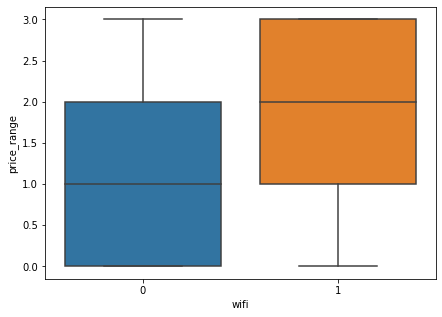

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['price_range'], x = df['wifi'])

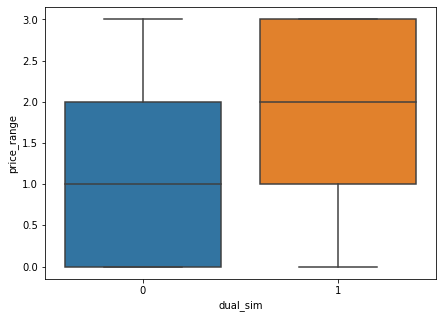

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['price_range'], x = df['dual_sim'])

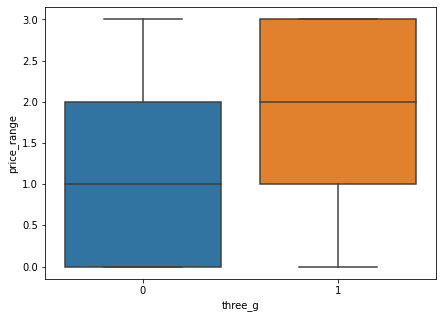

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df['price_range'], x = df['three_g'])

# Machine Learning

In [5]:
#converting screen width and height to scr_dmi
df['scr_dmi']=round(df['sc_h']*df['sc_w'],1)
df.drop(['sc_h','sc_w'],axis=1,inplace=True)

In [6]:
#converting pixel width and height to PPI.
df['ppi']=round(df['px_height']*df['px_width'],1)
df.drop(['px_height','px_width'],axis=1,inplace=True)

In [7]:
y=df['price_range']
x=df.drop(['price_range'],axis=1)

In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

scaler = StandardScaler()
scale=scaler.fit(x_train)
x_train_scaled=scale.transform(x_train)
x_test_scaled=scale.transform(x_test)

In [9]:
x_train.shape

(1600, 18)

In [10]:
x_test.shape

(400, 18)

# logistic regression

In [ ]:
clf= LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
importances = pd.DataFrame(data={'Attribute': x_train.columns,
                                'Importance': clf.coef_[0]
})
#sorting dataframe by descending value of coefficients
importances = importances.sort_values(by='Importance', ascending=True)

In [ ]:
importances

,Attribute,Importance
11,ram,-10.499555
0,battery_power,-2.627274
17,ppi,-2.510231
13,three_g,-0.128982
6,int_memory,-0.096808
4,fc,-0.092582
16,scr_dmi,-0.085076
10,pc,-0.069503
9,n_cores,-0.051443
12,talk_time,-0.020099


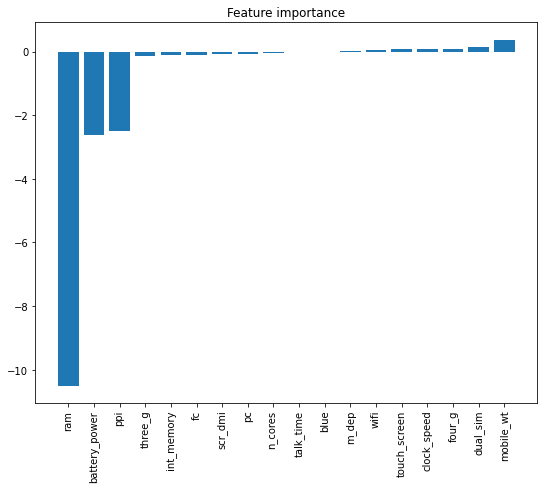

In [ ]:
#Visualising feature importance by their coefficient values
plt.figure(figsize=(9,7))
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.drop(['blue','m_dep','touch_screen','wifi'],axis=1,inplace=True)

In [ ]:
y=df['price_range']
x=df.drop(['price_range'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

scaler = StandardScaler()
scale=scaler.fit(x_train)
x_train_scaled=scale.transform(x_train)
x_test_scaled=scale.transform(x_test)

In [ ]:
clf= LogisticRegression(fit_intercept=True, max_iter=10000,solver="liblinear")
clf.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [ ]:
test_class_pred=clf.predict(x_test_scaled)
train_class_pred=clf.predict(x_train_scaled)

In [ ]:
test_class_pred[:10]

array([0, 2, 2, 3, 1, 2, 2, 0, 3, 1])

In [ ]:
y_test[:10]

1860    0
353     2
1333    1
905     3
1289    1
1273    1
938     2
1731    0
65      3
1323    1
Name: price_range, dtype: int64

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.840625
The accuracy on test data is  0.845


[[104   0   1   0]
 [ 12  60  19   0]
 [  0  17  62  13]
 [  0   0   0 112]]


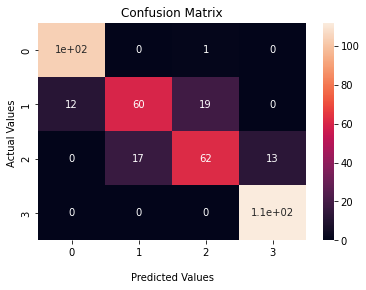

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

[[393   2   0   0]
 [ 42 284  83   0]
 [  0  75 284  49]
 [  0   0   4 384]]


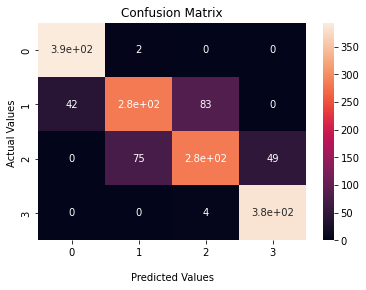

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_train, train_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [ ]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       105
           1       0.78      0.66      0.71        91
           2       0.76      0.67      0.71        92
           3       0.90      1.00      0.95       112

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



In [ ]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       395
           1       0.79      0.69      0.74       409
           2       0.77      0.70      0.73       408
           3       0.89      0.99      0.94       388

    accuracy                           0.84      1600
   macro avg       0.84      0.84      0.84      1600
weighted avg       0.83      0.84      0.84      1600



# Cross validation and hyperparameter tuning on Logistic Regression

In [ ]:
#Tuning parameters 
param_grid = [    
    {'penalty' : ['l1', 'l2', 'none'],
    'C' : [1.0, 0.1],
    'solver' : ['newton-cg','liblinear'],
    'max_iter' : [10, 50, 100,1000]
    }
]


In [ ]:
#Parameter fitted into GridSearch 
log_clf = GridSearchCV(clf, param_grid = param_grid, cv =3, verbose=True, n_jobs=-1, scoring='accuracy', error_score=0)

In [ ]:
best_clf=log_clf.fit(x_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

In [ ]:
best_clf.best_estimator_

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

In [ ]:
best_clf.best_params_

{'C': 1.0, 'max_iter': 1000, 'penalty': 'none', 'solver': 'newton-cg'}

In [ ]:
best_clf.best_score_

0.9287429175069626

In [ ]:
cv_accuracy= cross_val_score(best_clf, x_train, y_train,scoring='accuracy',cv=5)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

In [ ]:
print(f'accuracy of model with cross validation is {cv_accuracy[0]}')

accuracy of model with cross validation is 0.940625


# Random forest classifier

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)

scaler = StandardScaler()
scale=scaler.fit(x_train)
x_train_scaled=scale.transform(x_train)
x_test_scaled=scale.transform(x_test)

In [ ]:
clf1= RandomForestClassifier()
clf1.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
test_class_pred=clf1.predict(x_test_scaled)
train_class_pred=clf1.predict(x_train_scaled)

In [ ]:
test_class_pred[:10]

array([0, 2, 1, 3, 1, 2, 2, 0, 3, 1])

In [ ]:
y_test[:10]

1860    0
353     2
1333    1
905     3
1289    1
1273    1
938     2
1731    0
65      3
1323    1
Name: price_range, dtype: int64

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.87


[[101   4   0   0]
 [  7  74  10   0]
 [  0   9  75   8]
 [  0   0  14  98]]


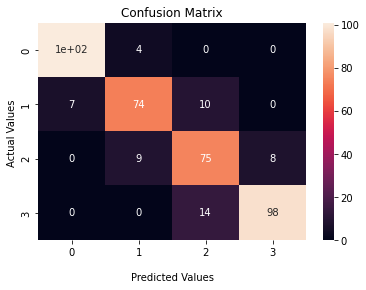

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

[[395   0   0   0]
 [  0 409   0   0]
 [  0   0 408   0]
 [  0   0   0 388]]


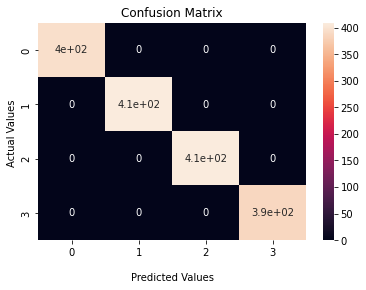

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_train, train_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [ ]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.85      0.81      0.83        91
           2       0.76      0.82      0.79        92
           3       0.92      0.88      0.90       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [ ]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# Cross validation and hyperparameter tuning on Random Forest Classifier

Tuning

In [37]:
from sklearn.pipeline import make_pipeline


In [38]:
pipelineRFC = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', random_state=1))

In [42]:
# Number of trees
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [43]:
# Grid search
rf_grid = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=2)

In [44]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=50)

In [45]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 100}

In [47]:
rf_grid.best_score_

0.8168749999999999

Cross validation

In [48]:
cv_accuracy= cross_val_score(rf_grid, x_train, y_train,scoring='accuracy',cv=5)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

In [ ]:
print(f'accuracy of model with Random tree classifier is {cv_accuracy[0]}')

accuracy of model with Random tree classifier is 0.821875


# SVM

In [10]:
svm_model=SVC()
svm_model.fit(x_train_scaled,y_train)

SVC()

In [11]:
test_class_pred=svm_model.predict(x_test_scaled)
train_class_pred=svm_model.predict(x_train_scaled)

In [12]:
test_class_pred[:10]

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1])

In [13]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.973125
The accuracy on test data is  0.87


[[98  7  0  0]
 [ 7 77  7  0]
 [ 0 11 76  5]
 [ 0  0 15 97]]


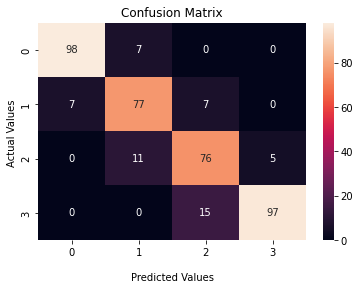

In [15]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, test_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

[[388   7   0   0]
 [  4 401   4   0]
 [  0  10 396   2]
 [  0   0  16 372]]


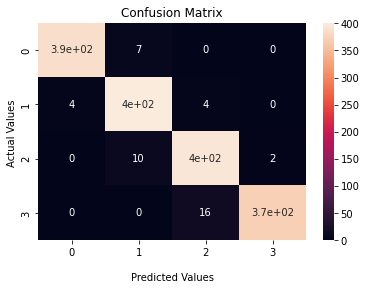

In [14]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_train, train_class_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True)
labels = ['0', '1', '2', '3']

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [16]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       105
           1       0.81      0.85      0.83        91
           2       0.78      0.83      0.80        92
           3       0.95      0.87      0.91       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [ ]:
print(classification_report(y_train,train_class_pred))

# Cross validation and hyperparameter tuning on SVM

In [9]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)

In [10]:
svm_grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.4s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [11]:
svm_grid.best_estimator_

SVC(C=100, gamma=0.01, kernel='sigmoid')

In [12]:
svm_grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [13]:
svm_grid.best_score_

0.9200000000000002

In [14]:
test_grid_predictions = svm_grid.predict(x_test_scaled)

In [15]:
train_grid_predictions = svm_grid.predict(x_train_scaled)

In [16]:
print(classification_report(y_test,test_grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.90      0.90        91
           2       0.87      0.86      0.86        92
           3       0.94      0.94      0.94       112

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400



In [17]:
print(classification_report(y_train,train_grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       395
           1       0.90      0.90      0.90       409
           2       0.88      0.88      0.88       408
           3       0.94      0.94      0.94       388

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



In [18]:
cv_accuracy= cross_val_score(svm_grid, x_train_scaled, y_train,scoring='accuracy',cv=5)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, k

In [19]:
print(f'accuracy of model with Random tree classifier is {cv_accuracy[0]}')

accuracy of model with Random tree classifier is 0.9125


# Decision tree 

In [32]:
clf= DecisionTreeRegressor()
clf.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [27]:
test_class_pred=clf.predict(x_test_scaled)
train_class_pred=clf.predict(x_train_scaled)

In [28]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  1.0
The accuracy on test data is  0.855


In [29]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       105
           1       0.80      0.81      0.81        91
           2       0.78      0.76      0.77        92
           3       0.89      0.91      0.90       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [49]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



# Cross validation and hyperparameter tuning on Decision tree regression

In [31]:
# Number of trees
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [34]:
# Grid search
rf_grid = GridSearchCV(estimator=clf,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


ValueError: ignored